# Загрузка данных

Данные взяты с сайта kaggle
[пользователи Netflix](https://www.kaggle.com/datasets/arnavsmayan/netflix-userbase-dataset)

Набор данных содержит информацию о доходе Netflix в долларах США и количестве платных подписчиков по регионам. В таблице есть поля:
* `User ID` - идентификатор пользователя,
* `Subscription Type` - тип подписки,
* `Monthly Revenue` - месячная стоимость подписки, $,
* `Join Date` - дата первого оформления подписки,
* `Last Payment Date` - дата последнего оформления подписки,
* `Country` - страна пользователя,
* `Age` - возраст,
* `Gender` - пол,
* `Device` - тип устройства,
* `Plan Duration` - количество оплаченных месяцев.

In [ ]:
# Импортируем библиотеки
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

In [ ]:
# Загружаем данные в датафрейм
df = pd.read_csv('/content/drive/MyDrive/zerocod/z_14/netflix/netflix_users_data.csv')

In [ ]:
# Смотрим основную информацию по столбцам
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [ ]:
# Выводим первые строки датафрейма
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


**Вывод:**

* В датафрейме 10 колонок и 2500 строк.
* Названия колонок не соответствует рекомендуемому стилю.
* Колонки с датой `Join Date`, `Last Payment Date` имеют несоответствующий тип данных. Колонку `Plan Duration` лучше привести к числовому значению для удобства в расчетах. Остальные колонки соответствуют своим значениям и присвоенным им типам данных.
* Все колонки заполнены без пропусков.

# Приведение столбцов к стилю snake_case

In [ ]:
# Составим функцию для переименования столбцов
def to_snake_case(column_name):
    return column_name.lower().replace(' ', '_')

# Применяем ко всем колонкам
df.columns = [to_snake_case(col) for col in df.columns]

In [ ]:
# Проверяем результат
df.columns

Index(['user_id', 'subscription_type', 'monthly_revenue', 'join_date',
       'last_payment_date', 'country', 'age', 'gender', 'device',
       'plan_duration'],
      dtype='object')

# Приведение типов данных

После первого знакомства с данными видно, что даты находятся в формате "день-месяц-год" в виде строк. Преобразуем эти колонки к соответствующему типу данных.

In [ ]:
# Приводим колонки с датами к типу datetime
df['join_date'] = pd.to_datetime(df['join_date'], format='%d-%m-%y')
df['last_payment_date'] = pd.to_datetime(df['last_payment_date'], format='%d-%m-%y')

In [ ]:
# Проверим диапазоны дат
print('Первая дата подписки:')
print(df['join_date'].min(), '-', df['join_date'].max())
print('---' * 20)
print('Последнее оформление подписки:')
print(df['last_payment_date'].min(), '-', df['last_payment_date'].max())

Первая дата подписки:
2021-09-05 00:00:00 - 2023-06-14 00:00:00
------------------------------------------------------------
Последнее оформление подписки:
2023-06-10 00:00:00 - 2023-07-15 00:00:00


In [ ]:
# Посмотрим уникальные значения в колонке 'plan_duration'
df['plan_duration'].unique()

array(['1 Month'], dtype=object)

Все пользователи оплачивали только один месяц подписки. Тогда эта колонка скорее всего нам не пригодиться, пусть остается как есть.

In [ ]:
# Проверим результат
df.info()
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            2500 non-null   int64         
 1   subscription_type  2500 non-null   object        
 2   monthly_revenue    2500 non-null   int64         
 3   join_date          2500 non-null   datetime64[ns]
 4   last_payment_date  2500 non-null   datetime64[ns]
 5   country            2500 non-null   object        
 6   age                2500 non-null   int64         
 7   gender             2500 non-null   object        
 8   device             2500 non-null   object        
 9   plan_duration      2500 non-null   object        
dtypes: datetime64[ns](2), int64(3), object(5)
memory usage: 195.4+ KB


,user_id,subscription_type,monthly_revenue,join_date,last_payment_date,country,age,gender,device,plan_duration
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month


**Вывод:**

* Колонки `join_date`, `last_payment_date` приведены к типу данных "datetime64[ns]".
* Оформление первой подписки находится в диапазоне 2021-09-05 - 2023-06-14.
* Колонка `plan_duration` содержит только одно значение, все пользователи продлевали подписку на один месяц.

# Поиск дублей и пропусков в данных

In [ ]:
# Проверим наличие дубликатов
df.duplicated().sum()

np.int64(0)

Проверим распределение числовых значений и уникальные категориальные значения, чтобы выявить ошибки или неявные дубликаты.

In [ ]:
# Посмотрим базовую статистику в колонках с числами
df[['monthly_revenue', 'age']].describe()

,monthly_revenue,age
count,2500.000000,2500.000000
mean,12.508400,38.795600
std,1.686851,7.171778
min,10.000000,26.000000
25%,11.000000,32.000000
50%,12.000000,39.000000
75%,14.000000,45.000000
max,15.000000,51.000000


Данные выглядят нормально, явных ошибок не видно.

In [ ]:
# Сохраним список столбцов с категориальными данными
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Посмотрим базовую статистику в этих столбцах
df[categorical_columns].describe()

,subscription_type,country,gender,device,plan_duration
count,2500,2500,2500,2500,2500
unique,3,10,2,4,1
top,Basic,United States,Female,Laptop,1 Month
freq,999,451,1257,636,2500


In [ ]:
# Посмотрим на уникальные значения в категориальных данных
for col in categorical_columns:
  print(f'{col}')
  print(df[col].unique())
  print('---' * 20)

subscription_type
['Basic' 'Premium' 'Standard']
------------------------------------------------------------
country
['United States' 'Canada' 'United Kingdom' 'Australia' 'Germany' 'France'
 'Brazil' 'Mexico' 'Spain' 'Italy']
------------------------------------------------------------
gender
['Male' 'Female']
------------------------------------------------------------
device
['Smartphone' 'Tablet' 'Smart TV' 'Laptop']
------------------------------------------------------------
plan_duration
['1 Month']
------------------------------------------------------------


**Вывод:**

Явных и неявных дубликатов и ошибок не обнаружено. Можно приступать к исследовательскому анализу.

# Исследовательский анализ данных

**Посмотрим количество уникальных пользователей**

In [ ]:
# Проверим количество уникальных клиентов
users_nuniq = df['user_id'].nunique()
print(f'Количество уникальных клиентов: {users_nuniq}')

Количество уникальных клиентов: 2500


Получается, что каждая строка - это информация про уникального клиента.

**Изучим возраст пользователей**

In [ ]:
# Посмотрим минимум и максимум значений возраста
print('Диапазон возраста клиентов:', df['age'].min(), '-', df['age'].max())

Диапазон возраста клиентов: 26 - 51


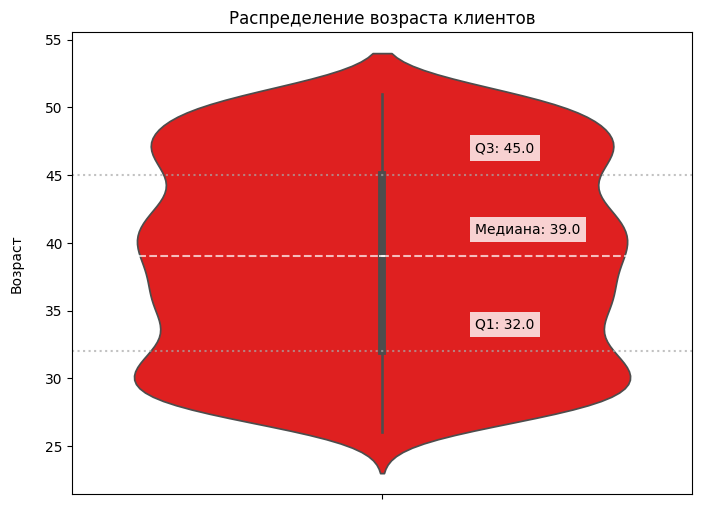

In [ ]:
# Построим скрипичный ключ с основными статистиками
plt.figure(figsize=(8, 6))
sns.violinplot(df['age'], color='red')
# Вычисляем нужные статистики
stats = df['age'].describe()
q1, median, q3 = stats['25%'], stats['50%'], stats['75%']
# Делаем заготовки для линий
lines = [
         (median, 'white', '--', f'Медиана: {median:.1f}'),
         (q1, 'darkgrey', ':', f'Q1: {q1:.1f}'),
         (q3, 'darkgrey', ':', f'Q3: {q3:.1f}')
        ]
# Наносим линию и текст для каждой статистики
for y, color, linestyle, text in lines:
    plt.axhline(y=y, color=color, linestyle=linestyle, alpha=0.7)
    plt.text(0.15, y+2, text, va='center', ha='left',
                bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
# Даем название графику
plt.title(f'Распределение возраста клиентов')
plt.ylabel('Возраст', labelpad=15)
plt.show()

Возраст находится в диапазоне 26-51 лет. Распределение имеет вид близкий к равномерному, об этом говорят пики значений расположенных за пределами линий Q1 и Q3. Это значит, что клиенты в возрасте 30 или 47 лет встречаются также часто, как клиенты с возростом близким к медиане (39 лет). Молодые пользователи до 32 лет встречаются немного чаще.

**Изучим пол пользователей**

In [ ]:
# Считаем долю мужчин и женщин
gender_counts = df['gender'].value_counts()
gender_counts_shares = gender_counts / gender_counts.sum() * 100
gender_counts_shares = gender_counts_shares.reset_index()

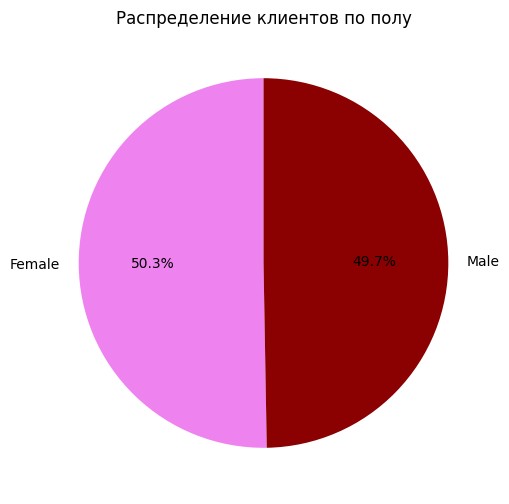

In [ ]:
# Построение круговой диаграммы
plt.figure(figsize=(6, 6))
plt.pie(gender_counts_shares['count'], labels=gender_counts_shares['gender'],
        colors=['violet', 'darkred'], autopct='%1.1f%%', startangle=90)
# Даем название графику
plt.title('Распределение клиентов по полу')
plt.show()

Распределение женщин и мужчин практически равномерное. 50.3% - доля женщин, 49.7% - доля мужчин.

**Изучим популярность девайсов**

In [ ]:
# Считаем доли
device_counts = df['device'].value_counts()
device_counts_shares = device_counts / device_counts.sum() * 100
device_counts_shares = device_counts_shares.reset_index()

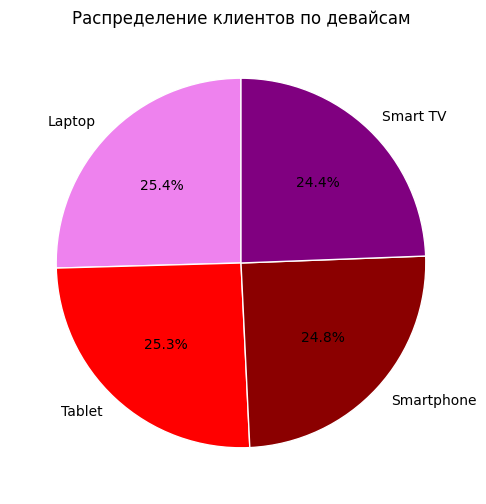

In [ ]:
# Построение круговой диаграммы
plt.figure(figsize=(6, 6))
plt.pie(device_counts_shares['count'], labels=device_counts_shares['device'],
        colors=['violet', 'red', 'darkred', 'purple'],
        autopct='%1.1f%%', startangle=90,
        wedgeprops={'edgecolor': 'white', 'linewidth': 1})
# Даем название графику
plt.title('Распределение клиентов по девайсам')
plt.show()

Использование девайсов распределено равномерно. Посмотрим отдельно для мужчин и женщин.

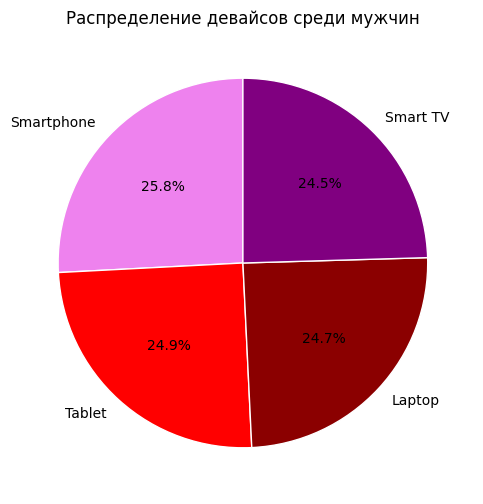

In [ ]:
# Считаем доли девайсов для мужчин
male_device_counts = df[df['gender'] == 'Male']['device'].value_counts()
male_device_counts_shares = male_device_counts / male_device_counts.sum() * 100
male_device_counts_shares = male_device_counts_shares.reset_index()

# Построение круговой диаграммы
plt.figure(figsize=(6, 6))
plt.pie(male_device_counts_shares['count'], labels=male_device_counts_shares['device'],
        colors=['violet', 'red', 'darkred', 'purple'],
        autopct='%1.1f%%', startangle=90,
        wedgeprops={'edgecolor': 'white', 'linewidth': 1})
# Даем название графику
plt.title('Распределение девайсов среди мужчин')
plt.show()

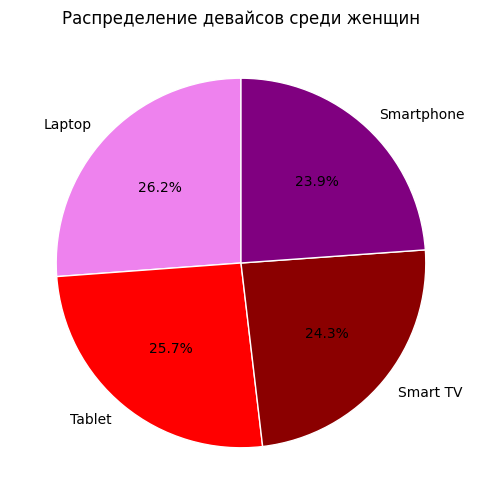

In [ ]:
# Считаем доли девайсов для женщин
female_device_counts = df[df['gender'] == 'Female']['device'].value_counts()
female_device_counts_shares = female_device_counts / female_device_counts.sum() * 100
female_device_counts_shares = female_device_counts_shares.reset_index()

# Построение круговой диаграммы
plt.figure(figsize=(6, 6))
plt.pie(female_device_counts_shares['count'], labels=female_device_counts_shares['device'],
        colors=['violet', 'red', 'darkred', 'purple'],
        autopct='%1.1f%%', startangle=90,
        wedgeprops={'edgecolor': 'white', 'linewidth': 1})
# Даем название графику
plt.title('Распределение девайсов среди женщин')
plt.show()

У мужчин распределение по девайсам практически равномерное, чуть больше отдают предпочтение смартфонам (25.8%). Женщины чуть больше отдают предпочтения ноутбукам (26.2%) и планшетам (25.7%).

**Изучим распределение пользователей в зависимости от типа подписки**

In [ ]:
# Считаем долю подписок
subscriptions_cnt = df['subscription_type'].value_counts()
subscriptions_share = subscriptions_cnt / subscriptions_cnt.sum() * 100
subscriptions_share = subscriptions_share.sort_values(ascending=False)

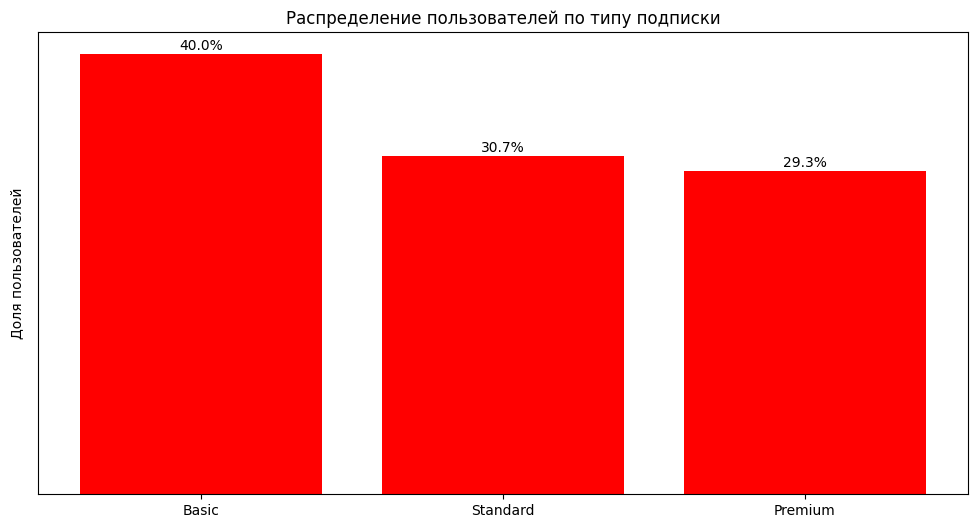

In [ ]:
# Построение столбчатой диаграммы
plt.figure(figsize=(12, 6))
bars = plt.bar(subscriptions_share.index, subscriptions_share.values, color='red')
# Добавление подписей значений на каждом столбце
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f"{yval:.1f}%", ha='center', va='bottom')
# Настройка отображения
plt.title('Распределение пользователей по типу подписки')
plt.ylabel('Доля пользователей', labelpad=10)
plt.yticks([])
plt.grid(False)
plt.show()

Большая часть клиентов (40%) предпочитает оформлять базовую подписку.

**Изучим локации пользователей**

In [ ]:
# Посчитаем количество пользователей по странам
cnt_users_per_country = df.groupby('country')['user_id'].count().sort_values(ascending=False)

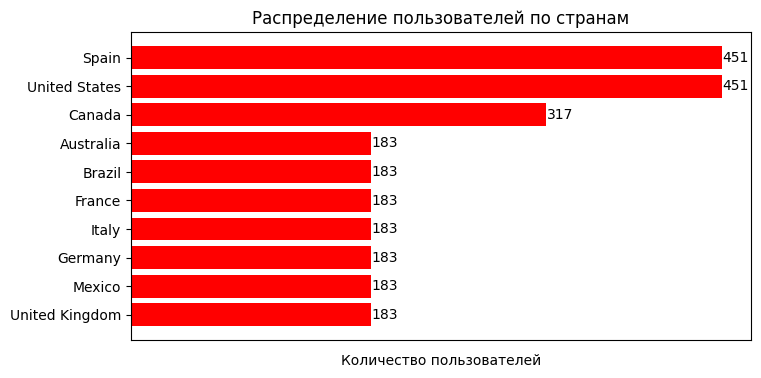

In [ ]:
# Построение столбчатой диаграммы
plt.figure(figsize=(8, 4))
bars = plt.barh(cnt_users_per_country.index, cnt_users_per_country.values, color='red')
plt.gca().invert_yaxis()
# Добавляем подписи значений
for bar in bars:
    xval = bar.get_width()                      # ← получаем ширину (значение по X)
    plt.text(xval + 0.5,                        # x-позиция (справа от столбца)
             bar.get_y() + bar.get_height()/2,  # y-позиция (центр столбца)
             f"{xval}",                         # форматированное значение
             ha='left', va='center')            # выравнивание слева по центру
# Настройка отображения
plt.title('Распределение пользователей по странам')
plt.xlabel('Количество пользователей', labelpad=10)
plt.xticks([])
plt.grid(False)
plt.show()

Пользователи из Испании и США оформляют подписки чаще, чем пользователи из других стран. По 451 клиенту с подпиской в Испании и США. Канада на третьем месте по этому показателю - 317 пользователей. На остальные страны приходится по 183 пользователя.

**Посмотрим динамику привлечения пользователей**

In [ ]:
# Создаем столбец в формате "год-месяц"
df['month'] = df['join_date'].dt.strftime('%Y-%m')

# Считаем количество пользователей в месяц
cnt_users = df.groupby('month')['user_id'].count().sort_index()

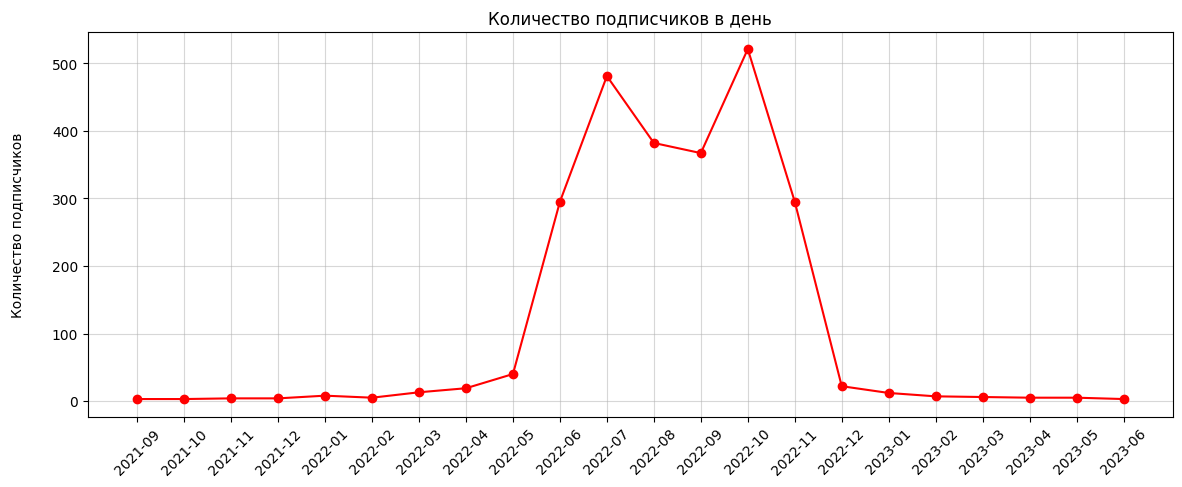

In [ ]:
# Построение линейного графика
plt.figure(figsize=(14, 5))
plt.plot(cnt_users.index, cnt_users.values, marker='o', color='red')
# Настройка отображения
plt.title('Количество подписчиков в месяц')
plt.ylabel('Количество подписчиков', labelpad=20)
plt.grid(alpha=0.5)
plt.xticks(rotation=45)
plt.show()

В 2022 году происходит заметная активность пользователей. 300 подписок в месяц и более, пиковые значения в июле и октябре, около 500 подписок в месяц. Такая активность продолжается с июня по ноябрь. В остальные месяца от 5 до 40 подписок в месяц. Возможно это связано с сезонностью. 2021 и 2023 года представлены не полностью, мы не видим летний период в эти года, поэтому утверждение о сезонности необходимо проверить на полных данных.

**Посмотрим динамику выручки**

In [ ]:
# Находим количество полных месяцев, для приблизительной точности разделим на "30.44"
df['duration_month'] = (df['last_payment_date'] - df['join_date']).dt.days // 30.44

# Прибавляем месяц, так как сначала идет оплата, а после оказание услуг
df['duration_month'] = (df['duration_month'] + 1).astype(int)

# Считаем полную прибыль от оказания услуг
df['total_revenue'] = df['duration_month'] * df['monthly_revenue']

In [ ]:
# Найдем ТОП-5 клиентов с наибольшими затратами
top_5_id = df['total_revenue'].sort_values(ascending=False)[:5].index

# Изучим детальную информацию ТОП-5 клиентов
df[df.index.isin(top_5_id)]

,user_id,subscription_type,monthly_revenue,join_date,last_payment_date,country,age,gender,device,plan_duration,month,duration_month,total_revenue
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month,2021-09,22,330
25,26,Premium,15,2022-01-12,2023-06-27,France,29,Male,Smartphone,1 Month,2022-01,18,270
47,48,Standard,12,2021-09-15,2023-06-24,Mexico,32,Male,Tablet,1 Month,2021-09,22,264
86,87,Premium,15,2021-12-28,2023-06-23,Brazil,45,Male,Smart TV,1 Month,2021-12,18,270
116,117,Basic,15,2021-10-30,2023-06-23,Brazil,40,Female,Tablet,1 Month,2021-10,20,300


ТОП-1 по продолжительности подписки и оплаченных услуг женщина из Канады в возрасте 35 лет с подпиской "Премиум".

In [ ]:
# Считаем суммарную выручку за каждый месяц
total_revenue_month = df.groupby('month')['total_revenue'].sum().sort_index()

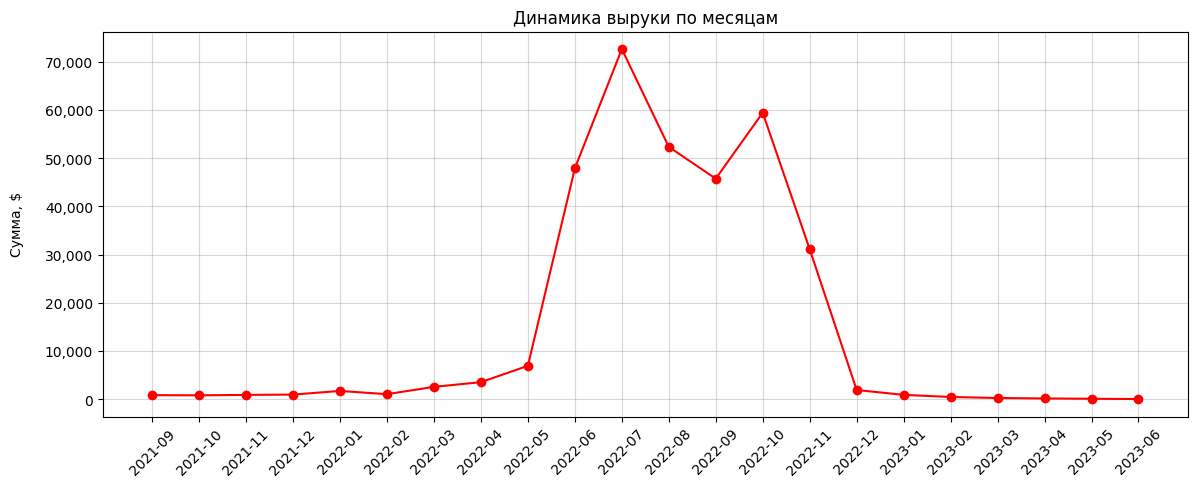

In [ ]:
# Построение линейного графика
plt.figure(figsize=(14, 5))
plt.plot(total_revenue_month.index, total_revenue_month.values, marker='o', color='red')
# Форматирование оси
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x:,.0f}'))
# Настройка отображения
plt.title('Динамика выруки по месяцам')
plt.ylabel('Сумма, $', labelpad=15)
plt.grid(alpha=0.5)
plt.xticks(rotation=45)
plt.show()

Самые прибыльные месяца с июня по ноябрь 2022 года, это полностью коррелирует с динамикой по количеству пользователей. В этот период доход в месяц составлял от 30,000 до 70,000 $, тогда как в остальные месяца он не превышает 5,000 \$. Не хватает данных за 2021 и 2023 года, чтобы мы могли увидеть закономерность такого роста.

**Посмотрим выручку по странам**

In [ ]:
# Посчитаем выручку по каждой стране
sum_revenue_countries = df.groupby('country')['total_revenue'].sum().sort_values(ascending=False)

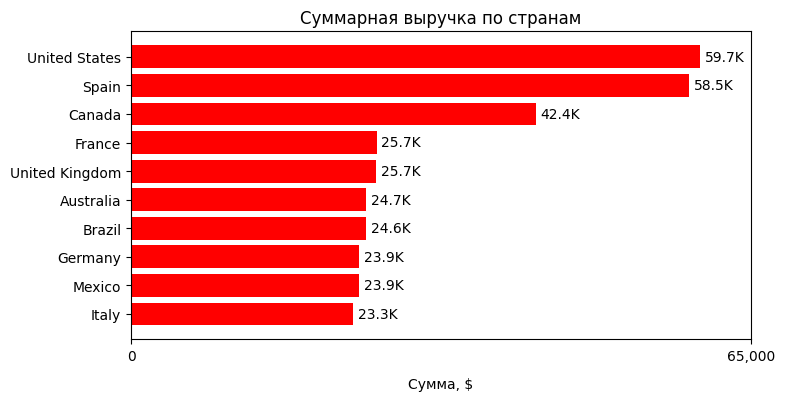

In [ ]:
# Построение столбчатой диаграммы
plt.figure(figsize=(8, 4))
bars = plt.barh(sum_revenue_countries.index, sum_revenue_countries.values, color='red')
plt.gca().invert_yaxis()
# Форматирование оси
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x:,.0f}'))
# Добавляем подписи значений
for bar in bars:
    xval = bar.get_width()                      # ← получаем ширину (значение по X)
    plt.text(xval + 500,                        # x-позиция (справа от столбца)
             bar.get_y() + bar.get_height()/2,  # y-позиция (центр столбца)
             f"{xval/1000:,.1f}K",              # форматированное значение
             ha='left', va='center')            # выравнивание слева по центру
# Настройка отображения
plt.title('Суммарная выручка по странам')
plt.xlabel('Сумма, $', labelpad=10)
plt.xticks([0, 65000])
plt.grid(False)
plt.show()

Самые большие суммарные выручки в США и Испании, 59.7К и 58.5К соответственно. Эти же страны лидируют по количеству оформленных подписок.

**Разделим клиентов по возрасту и определим самую платежеспособную группу**

In [ ]:
# Посмотрим минимум и максимум значений возраста
print('Диапазон возраста клиентов:', df['age'].min(), '-', df['age'].max())

Диапазон возраста клиентов: 26 - 51


In [ ]:
# Разбиваем клиентов на группы
df['age_groups'] = pd.cut(df['age'],
                          bins=[25, 35, 45, 55],
                          labels=['26-35', '36-45', '46-55'])

# Считаем сумму оплаченных подписок для каждой группы
sum_revenue_age_groups = df.groupby('age_groups', observed=True)['total_revenue'].sum().sort_values(ascending=False)

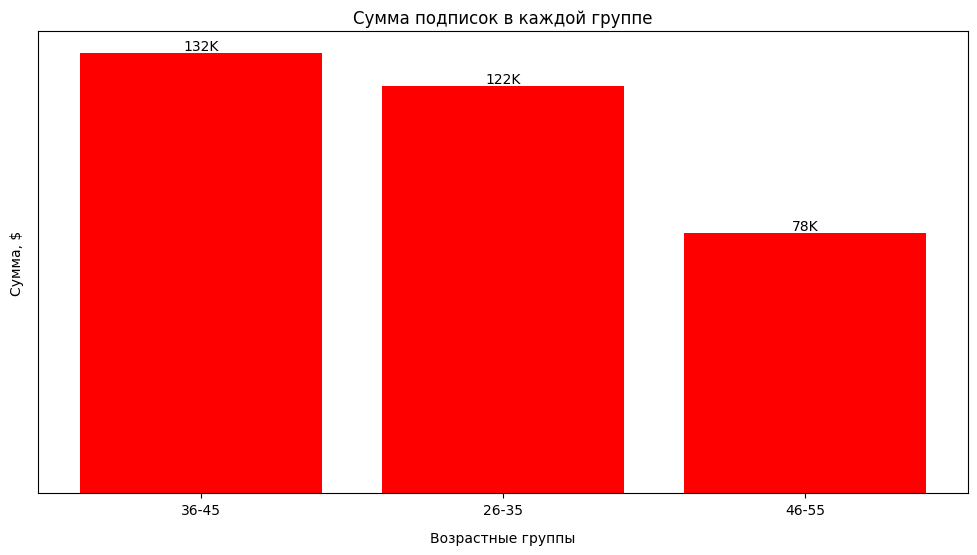

In [ ]:
# Построение столбчатой диаграммы
plt.figure(figsize=(12, 6))
bars = plt.bar(sum_revenue_age_groups.index, sum_revenue_age_groups.values, color='red')
# Добавление подписей значений на каждом столбце
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f"{int(yval)/1000:.0f}K", ha='center', va='bottom')
# Настройка отображения
plt.title('Сумма подписок в каждой группе')
plt.ylabel('Сумма, $', labelpad=10)
plt.xlabel('Возрастные группы', labelpad=10)
plt.yticks([])
plt.grid(False)
plt.show()

Группа в возрасте 36-45 лет больше остальных тратит на подписки, их суммарные затраты - 132,000 $. Более молодая группа 26-35 лет тратит 122,000 \$ на подписки. Клиенты с возрастом более 46 лет реже оформляют подписки.

**Изучим зависимость типа тарифа от группы возраста пользователя**

In [ ]:
# Посчитаем количество подписок каждого типа для каждой возрастной группы
subscriptions_age_groups = df.groupby(['age_groups', 'subscription_type'], observed=True).size().reset_index(name='count')

# Вычисляем процентное соотношение типов подписок внутри каждой группы
subscriptions_age_groups['total_count'] = subscriptions_age_groups.groupby('age_groups', observed=True)['count'].transform('sum')
subscriptions_age_groups['percentage'] = (subscriptions_age_groups['count'] / subscriptions_age_groups['total_count']) * 100

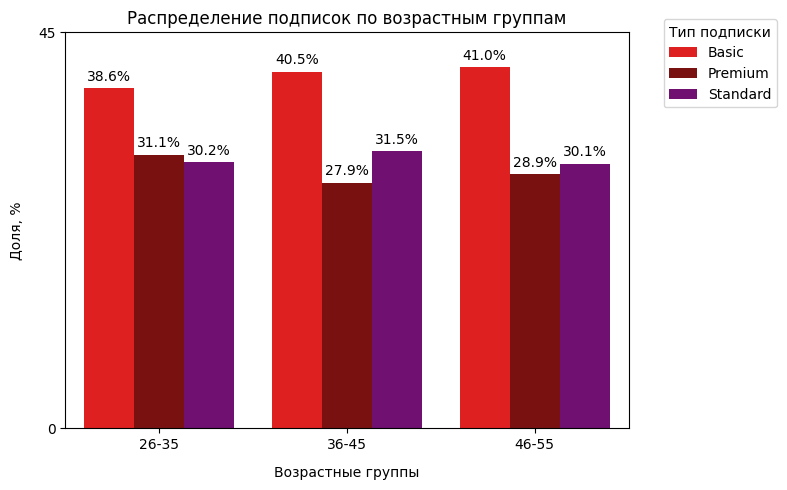

In [ ]:
# Строим график
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=subscriptions_age_groups,
                x='age_groups',
                y='percentage',
                hue='subscription_type',
                palette=['red', 'darkred', 'purple'])
# Добавляем значения
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', padding=3)
# Настройка отображения
plt.title('Распределение подписок по возрастным группам')
plt.xlabel('Возрастные группы', labelpad=10)
plt.ylabel('Доля, %', labelpad=10)
plt.yticks([0, 45])
plt.legend(title='Тип подписки', bbox_to_anchor=(1.05, 1.05), loc='upper left')
plt.tight_layout()
plt.show()

Все возрастные группы отдают предпочтение базовой подписке, она занимает долю близкую к 40% в каждой группе. Если рассматривать подписку премиум-класса, то она немного больше пользуется популярностью в возрастной группе 26-35 лет.

**Изучим зависимость типа тарифа от страны пользователя**

In [ ]:
# Посчитаем количество подписок каждого типа для каждой страны
subscriptions_in_countries = df.groupby(['country', 'subscription_type'], observed=True).size().reset_index(name='count')

# Вычисляем процентное соотношение типов подписок внутри каждой страны
subscriptions_in_countries['total_count'] = subscriptions_in_countries.groupby('country', observed=True)['count'].transform('sum')
subscriptions_in_countries['percentage'] = (subscriptions_in_countries['count'] / subscriptions_in_countries['total_count']) * 100

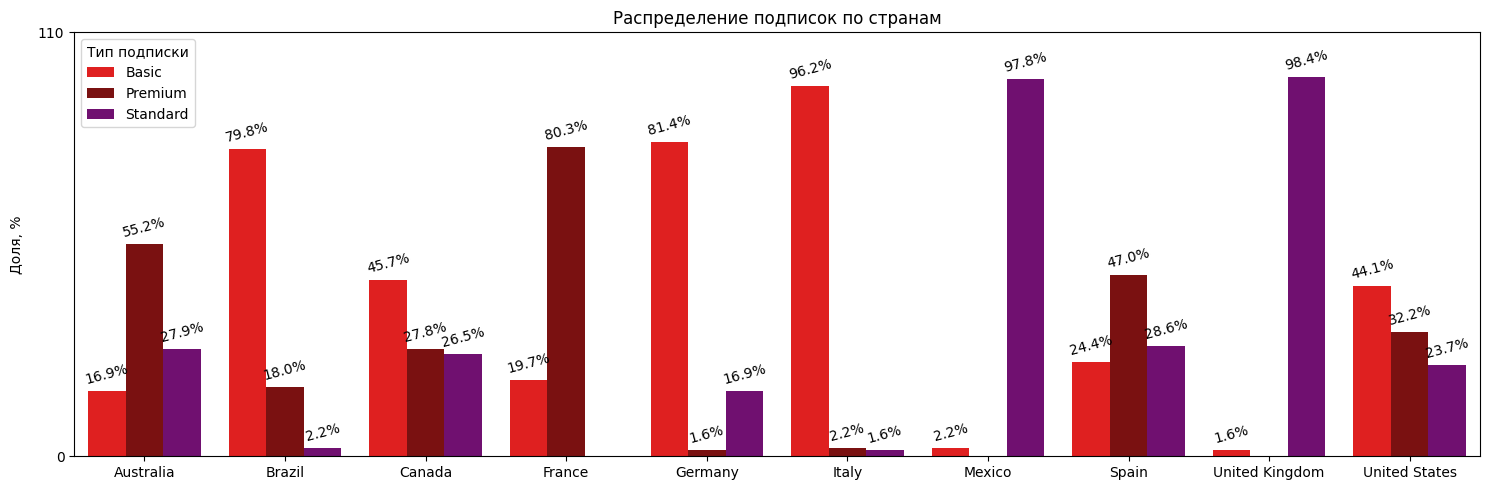

In [ ]:
# Строим график
plt.figure(figsize=(15, 5))
ax = sns.barplot(data=subscriptions_in_countries,
                x='country',
                y='percentage',
                hue='subscription_type',
                palette=['red', 'darkred', 'purple'])
# Добавляем значения
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', padding=3, rotation=15)
# Настройка отображения
plt.title('Распределение подписок по странам')
plt.xlabel('')
plt.ylabel('Доля, %', labelpad=10)
plt.yticks([0, 110])
plt.legend(title='Тип подписки', loc='upper left')
plt.tight_layout()
plt.show()

80.3% пользователей из Франции выбирают подписку премиум-класса. Ещё пользуется популярностью премиум подписка в Австралии (55.2%) и Испании (47%). При этом в Испании пользователей больше, чем во Франции или Австралии.

# Выводы исследовательского анализа

* В исследуемых данных 2500 строк, где каждая строка - это информация про уникального клиента.
* Возраст находится в диапазоне 26-51 лет. Клиенты разного возраста встречаются примерно одинаковое количество раз. Молодые пользователи до 32 лет встречаются немного чаще.
* Распределение женщин и мужчин практически равномерное. 50.3% - доля женщин, 49.7% - доля мужчин.
* У мужчин распределение по девайсам практически равномерное, чуть больше отдают предпочтение смартфонам (25.8%). Женщины чуть больше отдают предпочтения ноутбукам (26.2%) и планшетам (25.7%).
* Большая часть клиентов (40%) предпочитает оформлять базовую подписку.
* Пользователи из Испании и США оформляют подписки чаще, чем пользователи из других стран. По 451 клиенту с подпиской в Испании и США. 36% от всех пользователей приходится на эти две страны. В этих же странах самые большие суммарные выручки, 59.7К \$ и 58.5К \$ соответственно.
* В 2022 году происходит заметная активность пользователей. 300 подписок в месяц и более, пиковые значения в июле и октябре, около 500 подписок в месяц. Такая активность продолжается с июня по ноябрь. В остальные месяца от 5 до 40 подписок в месяц. Возможно это связано с сезонностью. 2021 и 2023 года представлены не полностью, мы не видим летний период в эти года, поэтому утверждение о сезонности необходимо проверить на полных данных.
* Самые прибыльные месяца с июня по ноябрь 2022 года, это полностью коррелирует с динамикой по количеству пользователей. В этот период доход в месяц составлял от 30,000 до 70,000 \$, тогда как в остальные месяца он не превышает 5,000 \$. Не хватает данных за 2021 и 2023 года, чтобы мы могли увидеть закономерность такого роста.
* Группа в возрасте 36-45 лет больше остальных тратит на подписки, их суммарные затраты - 132,000 \$. Более молодая группа 26-35 лет тратит 122,000 $ на подписки. Клиенты с возрастом более 46 лет реже оформляют подписки.
* Все возрастные группы отдают предпочтение базовой подписке, она занимает долю близкую к 40% в каждой группе. Если рассматривать подписку премиум-класса, то она немного больше пользуется популярностью в возрастной группе 26-35 лет.
* 80.3% пользователей из Франции выбирают подписку премиум-класса. Ещё пользуется популярностью премиум подписка в Австралии (55.2%) и Испании (47%). При этом в Испании пользователей больше, чем во Франции или Австралии.